# Data-Driven Assessment of Queensland's Low Emissions Agriculture Roadmap: Goals, Progress, and Community Impact

## Libraries

In [3]:
# Import the necessary libraries
from sklearn.feature_extraction.text import CountVectorizer # for counting terms
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.model_selection import TimeSeriesSplit # for linear regression
from sklearn.metrics import mean_squared_error # for linear regression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import json
import plotly.express as px
import os
from IPython.display import Image

-----   
## QUESTION
### Context 
[Advance Queensland Initiative](https://advance.qld.gov.au/) was launched in 2015 and is a significant investment by the Queensland Government to drive a more diversified Queensland economy, strengthen regional growth and create jobs.
Advance Queensland has involved the delivery of more than 140 programs and activities.

One of the key initiative of Advance Queensland is to deliver the [**Queensland Low Emissions Agriculture Roadmap 2022-2032**](https://www.daf.qld.gov.au/news-media/campaigns/low-emissions-roadmap) which is led by the Department of Agriculture and Fisheries. This initiative is defined in the [INNOVATION FOR A FUTURE ECONOMY 2022–2032 ROADMAP](https://advance.qld.gov.au/sites/default/files/future-of-innovation-priorities-roadmap.pdf) of Advance Queensland (priority 4, page 5).


### Question
In this work, I propose to familiarize with the [**Queensland Low Emissions Agriculture Roadmap 2022-2032**](https://www.daf.qld.gov.au/news-media/campaigns/low-emissions-roadmap) in more detail.

**Questions:**
> - What goals have been set for reducing emissions in agriculture in Queensland?
> - How effectively is progress being made towards these goals at the current moment? 
> - How important are this topic for the community and in what way?


### Plan
To answer those questions, I plan to consider:
1) Explore current [Queensland Low Emissions Agriculture Roadmap 2022-2032](https://www.daf.qld.gov.au/news-media/campaigns/low-emissions-roadmap) goals;
2) Find information in external open sources on current target indicators.
3) Assess what percentage of the goal has been achieved at the current moment, and whether the goals will be achieved by 2030 and 2050 while maintaining the current dynamics.
4) Find news on this topic, assess how much this topic worries the community and in what way.

## 1. Goals of Queensland Low Emissions Agriculture Roadmap 2022-2032

[Queensland Low Emissions Agriculture Roadmap 2022-2032](https://www.daf.qld.gov.au/news-media/campaigns/low-emissions-roadmap) defines vision, commitments and nessesary actions, more detail about program framework [here](https://www.daf.qld.gov.au/news-media/campaigns/low-emissions-roadmap/about-the-roadmap).

**Vision:** 
The Queensland agribusiness sector is a world leader in low-carbon production and supply chains.


**The Queensland Government is committed to:**
> 1. 30% reduction on 2005 GHG emissions by 2030;
> 2. Powering Queensland with 50% renewable energy by 2030, 70% by 2032 and 80% by 2035;
> 3. Zero net emissions by 2050.

**Let's take a closer look at the GHG  emissions reduction targets ([1] and [3]) below.**


## 2. Data for analysys

The targets I want to analyze are measured in greenhouse gas (GHG) emissions across Queensland state. 

### 2.1 Collecting Data

For the analysis, I will use open data from the portal of Australian Government Department of Climate Change, Energy, the Environment and Water - [Australia's National Greenhouse Accounts](https://greenhouseaccounts.climatechange.gov.au/). This portal is specially created for monitoring GHG emissions.

After analysing all available reports from this portal, I decide to use excel file `State & Territory Inventories 2021 - Emission Data Tables` from [Australia's National Greenhouse Accounts portal](https://greenhouseaccounts.climatechange.gov.au/) (*Home -> Datasets and API -> Activity tables -> Inventories*). This file is also available in my folder `Data`.

This file contains report with the official name **National Greenhouse Accounts 2021: State and Territory Greenhouse Gas Inventory, Australian Government Department of Climate Change, Energy, the Environment and Water (DCCEEW 2023).**



 

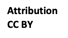


### 2.2 Preparing Data

The original data includes reports for each state and various sectors of activity. For my analysis, I will only use data pertaining to the state of Queensland and specifically in the context of agriculture (`State & Territory Inventories 2021 - Emission Data Tables` -> sheet `Qld`), which I will transfer to a separate Excel file. 

Thus, my new file `Queensland Agriculture Emissions.xls` contains information on greenhouse gas emissions in agriculture from the 1989-90 to the 2020-2021 fiscal years. Units: Gg CO₂-e (gigagrams of emissions in carbon dioxide equivalent, AR5 GWPs)

> **Important:** As of 2024, the most recent data available is for the 2020-21 fiscal year.

### 2.3 Importing Data
Import file `Queensland Agriculture Emissions.xls` as a Pandas DataFrame:

In [7]:
# Open xlx file into Pandas DataFrame
file_path = "Data/Queensland Agriculture Emissions.xls"
annual_emissions_df = pd.read_excel(file_path)
annual_emissions_df

,Year,1989-90,1990-91,1991-92,1992-93,1993-94,1994-95,1995-96,1996-97,1997-98,...,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21
0,Agriculture emissions,21635.353338,22362.10604,21800.769222,21238.414512,20514.066309,20434.446,20675.291148,21068.832105,22024.147349,...,22895.850358,23726.018177,23967.913073,21461.336118,21021.98892,21355.999392,22736.542934,21510.726674,19939.774759,20650.325613


### 2.4 Cleaning and Transforming Data

For further analysis, it is necessary to transform and clean the DataFrame:

1) Transpose the row to make it a column-based DataFrame.
2) Check the data types and, if necessary, transform them into correct formats. Convert fiscal years to calendar years.

#### 2.4.1 Transpose the row to make it a column-based DataFrame

In [10]:
# Transpose the row to make it a column-based DataFrame
annual_emissions_df = annual_emissions_df.transpose()
annual_emissions_df.reset_index(inplace=True)
annual_emissions_df.columns = ['Year', 'Agriculture emissions']
annual_emissions_df.head()

,Year,Agriculture emissions
0,Year,Agriculture emissions
1,1989-90,21635.353338
2,1990-91,22362.10604
3,1991-92,21800.769222
4,1992-93,21238.414512


Delete first row without data:

In [12]:
# Delete first row without data
rows_to_drop = annual_emissions_df[annual_emissions_df['Year'] == 'Year'].index

# Drop these row from the DataFrame
annual_emissions_df.drop(rows_to_drop, inplace=True)
annual_emissions_df.head()

,Year,Agriculture emissions
1,1989-90,21635.353338
2,1990-91,22362.10604
3,1991-92,21800.769222
4,1992-93,21238.414512
5,1993-94,20514.066309


#### 2.4.2 Convert attributes to necessary data types

Check data type:

In [14]:
# Check data type
annual_emissions_df.dtypes

Year                     object
Agriculture emissions    object
dtype: object

Convert attributes to necessary data types. 
Round the values in the 'Agriculture emissions' column to two decimal places and convert fiscal years to calendar years for convenience of information perception.

In [16]:
# Convert 'Queensland emissions' to a numeric type
annual_emissions_df['Agriculture emissions'] = pd.to_numeric(annual_emissions_df['Agriculture emissions'], errors='coerce')

# Round the 'Agriculture emissions' to 2 decimal places
annual_emissions_df['Agriculture emissions'] = annual_emissions_df['Agriculture emissions'].round(2)

# Convert 'Year' to datetime type and convert fiscal years to calendar years
annual_emissions_df['Year'] = annual_emissions_df['Year'].str.split('-').str[0]
annual_emissions_df['Year'] = pd.to_datetime(annual_emissions_df['Year'], format='%Y')

# Check results
annual_emissions_df.dtypes

Year                     datetime64[ns]
Agriculture emissions           float64
dtype: object

Check final DataFrame:

In [18]:
annual_emissions_df

,Year,Agriculture emissions
1,1989-01-01,21635.35
2,1990-01-01,22362.11
3,1991-01-01,21800.77
4,1992-01-01,21238.41
5,1993-01-01,20514.07
6,1994-01-01,20434.45
7,1995-01-01,20675.29
8,1996-01-01,21068.83
9,1997-01-01,22024.15
10,1998-01-01,21837.90


**Our data is ready for further analysys.**

## 3. The analysys of current results of Queensland Low Emissions Agriculture Roadmap 2022-2032

Let's create a plot to observe the progress towards the set goals for reducing greenhouse gas emissions in agriculture:

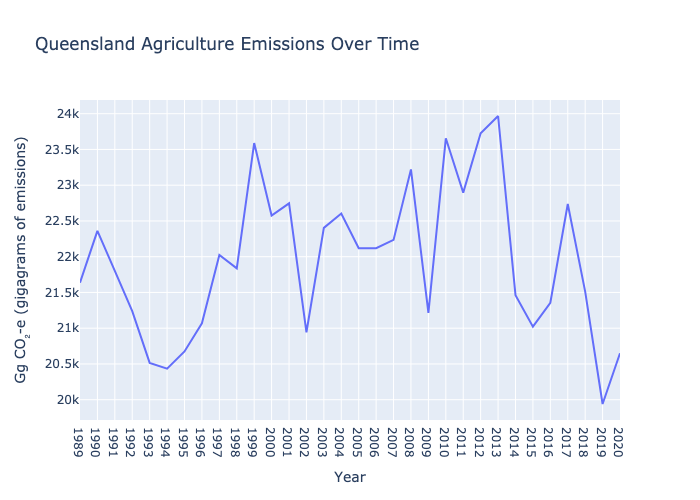

In [21]:
folder = "Data"
file_name = "plot1.png"
file_path = os.path.join(folder, file_name)

# Create a line plot 
fig = px.line(annual_emissions_df, x='Year', y='Agriculture emissions',
              title='Queensland Agriculture Emissions Over Time',
              labels={'Year': 'Year', 'Agriculture emissions': 'Gg CO₂-e (gigagrams of emissions)'})

# Update x-axis to show each year
years = annual_emissions_df['Year'].dt.strftime('%Y').unique()
fig.update_xaxes(
    tickvals=years, 
    tickformat="%Y"  # Formatting to show just the year
)

fig.write_image(file_path)
Image(file_path)

**We can calculate the percentage of progress towards the set goals as of the year 2020:**

*Nearest goal by Roadmap: 30% reduction on 2005 emissions by 2030*

- **2005:** `22119.17` Gg CO₂-e (from our DataFrame)
- **Goal 2030:** 22119.17 * (1 - 0.3) = `15483.42` Gg CO₂-e (by calculation)

  
- **2020:** (1- (20650.33 / 22119.17)) * 100 = `6.64%`

___________
#### Insights
> Actual agruculture emission reduction by 2020 is `6.64%` from the levels observed in 2005.
> But based on these data, it's difficult to understand how well it is progressing towards the set goals.
>
> However, we also see on the line graph that the movement towards the set goals **is very unstable**, with data consistently jumping up and down.
>
> **To analyze such dynamics, I suggest focusing on the recent years - specifically from 2010 to 2020**, as we observe, with some assumptions, some movement towards reducing emissions. 


For clarity, let's highlight this segment in color on the graph. 

I group data before base year and after base year:

In [24]:
# Categorize 'Year' using a lambda function
annual_emissions_df['Group'] = annual_emissions_df['Year'].apply(
    lambda x: 'after base year' if x.year >= 2010 else 'before base year')

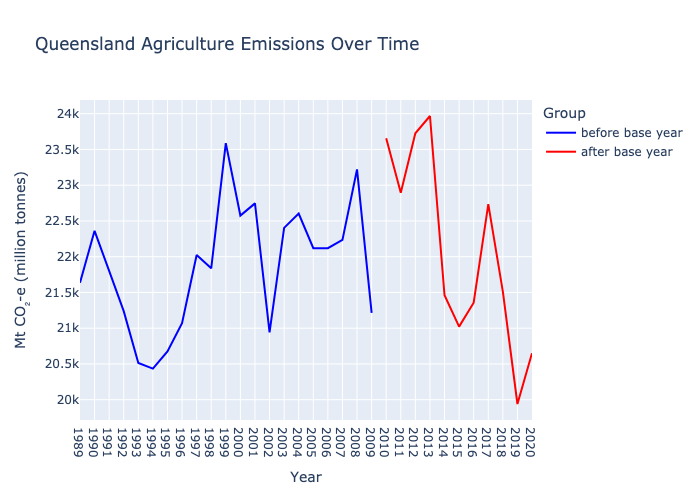

In [25]:
folder = "Data"
file_name = "plot2.png"
file_path = os.path.join(folder, file_name)

# Generate the plot
fig = px.line(annual_emissions_df, x='Year', y='Agriculture emissions',
              color='Group',
              title='Queensland Agriculture Emissions Over Time',
              labels={'Year': 'Year', 'Agriculture emissions': 'Mt CO₂-e (million tonnes)'},
              color_discrete_map={'before base year': 'blue', 'after base year': 'red'})

# Update x-axis to show each year
years = annual_emissions_df['Year'].dt.strftime('%Y').unique()
fig.update_xaxes(
    tickvals=years,
    tickformat="%Y"
)


fig.write_image(file_path)
Image(file_path)


Let's use a **linear regression algorithm** to, based on the model created, have an understanding of what the emission reduction indicators will be by 2030 if the current trend continues. For creating this model, **I will use the data from 2010 to 2020**, as it is during this period, with some assumptions, that we observe a linear trend.

## 4. Linear Regression modelling for predicting agriculture emissions in the future

### 4.1 Preparing data for model

For creating Linear Regression model I need to use data from 2010 to 2020, thus I need create new filtered by this parameter DataFrame. 

In [29]:
# Create new filtered DataFrame
emission_program_df = annual_emissions_df[annual_emissions_df['Group']== 'after base year']
emission_program_df = emission_program_df.reset_index(drop=True)

emission_program_df.head()

,Year,Agriculture emissions,Group
0,2010-01-01,23656.12,after base year
1,2011-01-01,22895.85,after base year
2,2012-01-01,23726.02,after base year
3,2013-01-01,23967.91,after base year
4,2014-01-01,21461.34,after base year


I need to convert `Year` attribute to numeric format for linear regression:

In [31]:
# Convert 'Year' to an integer format for linear regression
emission_program_df['Year'] = emission_program_df['Year'].dt.year

# Check Data Types
emission_program_df.dtypes

Year                       int32
Agriculture emissions    float64
Group                     object
dtype: object

### 4.2 Setting up Predictor and Outcome variables

To fit a linear regression model, we need to assign the dependent variable that we want to predict to the Y-axis, and draw the X-axis data from the independent variables.

In [33]:
X = emission_program_df[['Year']]  # Predictor (independent variable)
y = emission_program_df['Agriculture emissions']  # Outcome (dependent variable)

### 4.3 Setting up Time Series Split

In forecasting scenarios where actual future data is unavailable, we can use cross-validation techniques within historical data to estimate the performance of our model. This approach helps to simulate how our model might perform in predicting future data points. 

Because time series data points are sequential, we cannot randomly shuffle and split the data as we can with other types of data. Instead, we can use TimeSeriesSplit from sklearn.model_selection which progressively increases the size of the training dataset while keeping the test set size constant.

In [35]:
# Initialize time series split with desired number of splits
tscv = TimeSeriesSplit(n_splits=2)

### 4.4 Creating and training Linear Regression Model

Below I will define  train and test data sets using Time Series Split and then create and train Linear Regression Model.

**Assess the model's performance:**
Because this is forecasting  model with time as a predictor, for evaluating our model I need to use MSE (Mean Squared Error). 

As I use Time Series Split, for calculating MSE I need to use special dictionary to record MSE and use loop during training my model.


In [37]:
scores = []  # to store mean squared error scores

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a new linear regression model
    linear_model = LinearRegression() 
    
    # Train the model
    linear_model.fit(X_train, y_train)

    # Make predictions
    y_pred = linear_model.predict(X_test)

    # Calculate and record the MSE for this fold
    mse = mean_squared_error(y_test, y_pred)
    scores.append(mse)
    print(f"MSE for fold: {mse}")

# Calculate average MSE across all folds
average_mse = np.mean(scores)
print(f"Average MSE across all folds: {average_mse}")


MSE for fold: 1015379.3189773274
MSE for fold: 380714.236711446
Average MSE across all folds: 698046.7778443868


**Assess the model's performance:**

The MSE and average MSE indicators turned out to be quite large, indicating a significant difference between the actual data and the predicted data. This means that the resulting model is not very efficient.

We cannot use this model for accurate predictions, but we can use it to observe the dynamics of changes in reducing greenhouse gas emissions.



### 4.5 Predicting future values

As I have 2 goals (by 2030 and 2050) I will make predictions till 2050 year.

In [40]:
# Predict from 2021 to 2050
future_years = pd.DataFrame({'Year': range(2021, 2051)})
future_years['Predicted Emissions'] = linear_model.predict(future_years)

# Round the predicted emissions to two decimal places
future_years['Predicted Emissions'] = future_years['Predicted Emissions'].round(2)

future_years

,Year,Predicted Emissions
0,2021,20392.46
1,2022,20097.75
2,2023,19803.05
3,2024,19508.35
4,2025,19213.65
5,2026,18918.95
6,2027,18624.24
7,2028,18329.54
8,2029,18034.84
9,2030,17740.14


### 4.7 Analysing predicting results

Let's calculate the percentage of goal achievement for the years 2030 and 2050 based on the predicted data from the linear regression model.

**Nearest goal by Roadmap: 30% reduction on 2005 emissions by 2030**

| Year | Emissions| Reduction % |
|---------------------|-----------------------------------------|-------------------|
| **Base year 2005:** | `22119.17` Gg CO₂-e (from our DataFrame)|                   |
| **Plan Goal 2030:** | `15483.42` Gg CO₂-e, | **Plan reduction 2030:** `30%`|
|**Predicted value 2030:**| `17740.14` Gg CO₂-e,| **Predicted reduction 2030:** (1-(17740.14/22119.17))*100 = `19.8%`|


_________
> Based on the predicted data from the linear regression model agruculture emission reduction by 2030 is `19.8%` from the levels observed in 2005.
> The predicted indicator shows a trend towards reducing emissions, but the calculated figure is below the planned 30%.
>
> It's also important to note that our model does not take into account additional planned actions from the roadmap aimed at reducing emissions, which are likely to increase the reduction dynamics.
>
> Moreover, the model has a relatively low efficiency rating. However, it does provide an understanding that, without additional actions, the planned targets will not be met within the given timelines.


**Next goal by Roadmap: 100% reduction on 2005 emissions by 2050**

| Year | Emissions| Reduction % |
|---------------------|-----------------------------------------|-------------------|
|**Base year 2005:**| `22119.17` Gg CO₂-e (from our DataFrame)||
|**Plan Goal 2050:**| `0` Gg CO₂-e |**Plan reduction 2050:** `100%`|
|**Predicted value 2050:**| `11846.10` Gg CO₂-e|**Predicted reduction 2050:** (1-(11846.10/22119.17))*100 = `46.44%`|
_________

> In the longer-term perspective of 2050, we can see a significant gap between the planned indicators and those predicted. Given that our model has a low efficiency rating, it can still provide a high-level understanding that without additional measures from the program, the goals will not be achievable within the set deadlines.


### 4.6 Visualizing predictions

Let's plot the historical emissions data from 2010 to 2020, along with predictions from 2021 onwards made using a linear regression model.

For the visualization, I will be using the `matplotlib.pyplot` library.

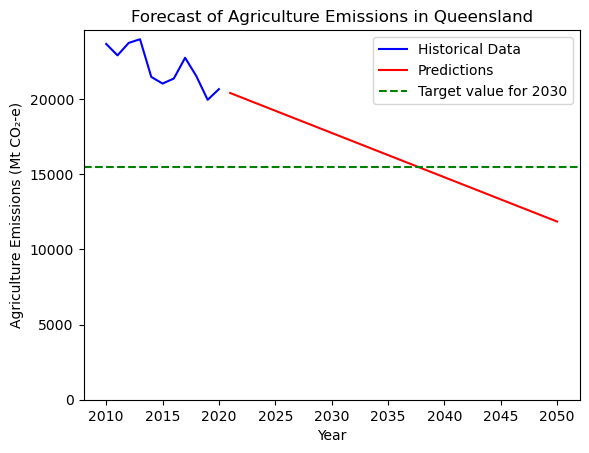

In [44]:
# Historical Data
plt.plot(X, y, color='blue', label='Historical Data')

# Future Predictions as line
plt.plot(future_years['Year'], future_years['Predicted Emissions'], color='red', label='Predictions')

# Add baseline
plt.axhline(y=15483.42, color='green', linestyle='--', label='Target value for 2030')

# Set the title and labels
plt.title('Forecast of Agriculture Emissions in Queensland')
plt.xlabel('Year')
plt.ylabel('Agriculture Emissions (Mt CO₂-e)')

# Adjust y-axis to start from 0
plt.ylim(bottom=0)

# Add legend to the plot
plt.legend()

# Display the plot
plt.show()


_________
### Insights
> The data visualization clearly shows that, based on the predicted data for reducing greenhouse gas emissions and maintaining current dynamics, the target values will not be achieved by 2030 and by 2050.
> 
> Given that our linear regression model has a low efficiency rating, it can still provide a high-level understanding that without additional measures from the program, the goals will not be achievable within the set deadlines.

## 5. The analysis of news regarding the reduction of emissions in agriculture in Queensland using the Guardian API

Let's find news regarding the reduction of emissions in agriculture in Queensland to assess how much this topic worries the community and in what way.

For my analysys I will use the Guardian API.

[Guardian Open Platform - explore](https://open-platform.theguardian.com/explore/)

### 5.1 Loading articles from The Guardian

Before the analysis, I separately compiled a JSON file with articles using the Guardian API. To form this pool of news articles, I used the following search regular expression:
- **Queensland AND (agriculture OR meat) AND (emissions OR greenhouse OR carbon)**
- From 01.01.2020
- Considering only news from Australia.
  
Before selecting the final search query, I went through various options, gradually adding new words. For example, only during the analysis I realized that some articles about livestock farming do not mention the word agriculture, so I added the word "meat" to the conditions. Emissions are also referred to differently in articles.

In the final set of news, I ended up with **292 articles**.

Load articles from my file `Queensland_agriculture_meat_emission_articles_from_01_01_2022_.json`:


In [47]:
# Load the data - articles from The Guardian
file_name = "Data/Queensland_agriculture_meat_emission_articles_from_01_01_2022_.json"

with open(f"{file_name}",'r', encoding='utf-8') as fp:
    articles = json.load(fp)

print(f"Loaded {len(articles)} articles from {file_name}")

Loaded 292 articles from Data/Queensland_agriculture_meat_emission_articles_from_01_01_2022_.json


### 5.2 Choosing term modelling approach

I experimented with three term modeling approaches: Term count, Term Frequency / Inverse Document Frequency (TF/IDF), and Topic modeling with Non-negative Matrix Factorization (NMF).

**Analyzing the results, I concluded that for the purposes of my analysis, the simplest approach, Term count, was most suitable for me.** It effectively highlighted high-level search terms such as "carbon" and "emissions." The other two approaches, TF/IDF and NMF, generally produced similar results, but the terms for some articles were more narrow and specific. These results would have been harder for me to filter to find the most relevant articles.

Below, I will present the results of the Term Count analysis.

### 5.3 Term Count

**Finding important terms by the frequency of their occurance**

Using `CountVectorizer` create a `vector` for each document where the dimensionality of the vector is the `vocabulary` (all terms in the collection), and the value of each component is the number of times that the `term` occurs in the document.

All of these analyses, approach the document as a [Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model) model. In this approach, the order of the words don't matter.

In [50]:
# Only count terms that in maximum of 75% of documents, and a minimum of 2 documents. 
# Count a maximum of 10000 terms, and remove common english stop words
count_vectorizer = CountVectorizer(max_df=0.75,min_df=2,max_features=10000,stop_words="english")
count_dt_matrix = count_vectorizer.fit_transform(articles.values())

# Get the 1000 terms identified during the vectorization process
feature_names = count_vectorizer.get_feature_names_out()
len(feature_names)

10000

In [51]:
# Create a new dataframe with the matrix - use titles for the index and terms for the columns
count_df = pd.DataFrame(count_dt_matrix.toarray(), index=articles.keys(), columns=feature_names)

# Create a dataframe to hold top terms
terms_df = pd.DataFrame(index=count_df.index,columns=['count'])

#For each doc, get the 10 columns with the largest counts
for idx in terms_df.index:
    counts = dict(count_df.loc[idx].sort_values(ascending=False).head(10))
    #print(counts)
    terms_df.at[idx,'count'] = list(counts.keys()) # Just the list of terms

terms_df

,count
"Australian red meat industry has recorded 78% reduction in emissions since 2005, industry report found [2024-05-01T23:39:16Z]","[net, sequestration, meat, cattle, mla, land, ..."
Australian red meat industry’s net zero target based on land-clearing data that is ‘not reliable’ [2024-02-12T14:00:19Z],"[land, 2005, meat, deforestation, reduction, c..."
Queensland rejects Glencore carbon capture and storage proposal for Great Artesian Basin [2024-05-24T06:12:49Z],"[ccs, project, basin, glencore, proposal, prot..."
Methane emissions: Australian cattle industry suggests shift from net zero target to ‘climate neutral’ approach [2024-05-07T15:00:20Z],"[target, neutral, net, cattle, zero, methane, ..."
Australian red meat industry says it doesn’t need to meet its self-imposed net zero target [2024-02-07T14:00:49Z],"[target, net, meat, methane, zero, red, livest..."
...,...
Cost of cancelling French submarines revealed – as it happened [2022-11-08T08:03:01Z],"[gmt, senator, budget, estimates, senate, afp,..."
Craig Kelly egged in Melbourne; Ukraine ambassador flags need for more support – as it happened [2022-04-08T08:42:38Z],"[bst, april, mdash, flood, covid, river, https..."
O’Neil defends offshore processing move – as it happened [2023-02-07T07:29:30Z],"[gmt, greens, rate, voice, inflation, thorpe, ..."
More than 150 rescues made as SES shifts efforts north – as it happened [2022-07-05T08:27:34Z],"[bst, flood, july, covid, evacuation, coast, w..."


Let's take a closer look at the terms that were formulated for the articles found. Bellow are the first 10 articles.

In [53]:
for index, doc in terms_df.head(10).iterrows():
    print(f"{doc.name}")
    print("Counts:", doc['count'])
    print()

Australian red meat industry has recorded 78% reduction in emissions since 2005, industry report found [2024-05-01T23:39:16Z]
Counts: ['net', 'sequestration', 'meat', 'cattle', 'mla', 'land', 'carbon', 'red', 'zero', 'greenhouse']

Australian red meat industry’s net zero target based on land-clearing data that is ‘not reliable’  [2024-02-12T14:00:19Z]
Counts: ['land', '2005', 'meat', 'deforestation', 'reduction', 'clearing', 'mla', 'red', 'cattle', 'taylor']

Queensland rejects Glencore carbon capture and storage proposal for Great Artesian Basin [2024-05-24T06:12:49Z]
Counts: ['ccs', 'project', 'basin', 'glencore', 'proposal', 'protect', 'environmental', 'co2', 'rural', 'spokesperson']

Methane emissions: Australian cattle industry suggests shift from net zero target to ‘climate neutral’ approach [2024-05-07T15:00:20Z]
Counts: ['target', 'neutral', 'net', 'cattle', 'zero', 'methane', 'reduction', 'mla', 'meat', 'heating']

Australian red meat industry says it doesn’t need to meet its 

After taking a closer look at the terms formed for the found articles, it appears that both highly relevant articles and non-relevant ones have been included in the sample. We will filter out the highly relevant articles using the search terms 'emissions', 'carbon', 'meat', 'reduction' (this list of words was formed after analyzing the existing terms for the articles).

In [55]:
# Filter all articles by specified terms
filtered_df = terms_df[terms_df['count'].apply(lambda x: any(item in x for item in ['emissions', 'carbon', 'meat', 'reduction']))]

filtered_df

,count
"Australian red meat industry has recorded 78% reduction in emissions since 2005, industry report found [2024-05-01T23:39:16Z]","[net, sequestration, meat, cattle, mla, land, ..."
Australian red meat industry’s net zero target based on land-clearing data that is ‘not reliable’ [2024-02-12T14:00:19Z],"[land, 2005, meat, deforestation, reduction, c..."
Methane emissions: Australian cattle industry suggests shift from net zero target to ‘climate neutral’ approach [2024-05-07T15:00:20Z],"[target, neutral, net, cattle, zero, methane, ..."
Australian red meat industry says it doesn’t need to meet its self-imposed net zero target [2024-02-07T14:00:49Z],"[target, net, meat, methane, zero, red, livest..."
How many cattle are there in Australia? We may be out by 10 million [2024-03-10T14:00:05Z],"[cattle, million, meat, abs, red, walter, farm..."
An Australian farmer has held the first carbon-neutral cattle sale – here’s how it works [2024-03-22T23:00:06Z],"[carbon, soil, cattle, farm, neutral, sale, ne..."
Spectre of ‘climate wars’ looms in Queensland as LNP urged to back government’s emissions reduction target [2024-02-14T14:00:38Z],"[target, panel, 2035, targets, 75, expert, ind..."
"Gina Rinehart, One Nation and the Greens all oppose Glencore’s plan to store CO2 in the Great Artesian Basin – why? | Temperature Check [2024-05-09T01:23:36Z]","[glencore, project, water, co2, carbon, storag..."
"Australia could reach an ‘ambitious’ emissions cut of up to 75% by 2035, advisers tell Labor [2024-04-11T15:00:27Z]","[target, 2035, authority, range, 75, reduction..."
Australia’s emissions fell 0.4% in 2022 despite increases in transport and agriculture pollution [2023-05-31T09:42:12Z],"[co2, land, carbon, tonnes, june, total, pollu..."


In [56]:
filtered_df.count()

count    19
dtype: int64

______________
As a result, I obtained a list of 19 highly relevant articles on the topic of reducing greenhouse gas emissions in Queensland. All the articles are recent, including four very fresh articles from May.

**Next, I will analyze the most relevant and recent articles in more detail to understand what currently concerns the community regarding our topic.**

### 5.4 Analysing final list of news articles

As a result of a more detailed analysis of articles from the final list, I would highlight two themes that concern society regarding the topic of reducing greenhouse gas emissions in Queensland.

**Topic 1:**
The majority of articles discuss the incorrect assessment of reductions in greenhouse gas emissions in Queensland's red meat industry, which largely occurred due to a reduction in deforestation levels. According to independent sources, the level of deforestation is higher than reported in official documents. In turn, livestock farming is the main source of greenhouse emissions in agriculture. Therefore, the model on which the target indicators are based may not be reliable.

**Topic 2:**
There is ambitious legislation proposed by Queensland Premier Steven Miles aiming for a 75% cut in carbon emissions by 2035, but the Queensland opposition wants to see the modeling before responding. 

**Below, I will provide quotes from some of the articles.**
________
1. [13.02.2024 - Australian red meat industry’s net zero target based on land-clearing data that is ‘not reliable’](https://www.theguardian.com/australia-news/2024/feb/13/australia-red-meat-industry-net-zero-target-land-clearing-data-not-reliable)

**Story short:** Meat and Livestock Australia says it has reduced emissions by 65% on 2005 levels but **data analysis suggests figures underpinning claim are ‘erroneous’**

**Quotes:**
> **In Queensland, where roughly 44% of the national cattle herd grazes and the majority of land clearing has occurred**, the Statewide Landcover and Tree Study (Slats) **has recorded deforestation at almost twice** the rate of the national system used to calculate emissions on the red meat industry.
>
> In an analysis of both systems, Martin Taylor, a former conservation scientist with WWF Australia and now adjunct senior lecturer at the University of Queensland, **found the national carbon accounting system (NCAS) may be significantly underreporting deforestation in the state**.
> 
> “We can’t be building stories on data that analysis suggests is erroneous.”
> 
> Taylor’s latest report, released in December, analysed satellite data from 2018-19 and 2019-20 **and concluded deforestation in Queensland is 36-62% higher than NCAS reporting**.
_______
2. [2.05.2024 - Australian red meat industry has recorded 78% reduction in emissions since 2005, industry report found](https://www.theguardian.com/australia-news/2024/may/02/australian-red-meat-industry-has-recorded-78-reduction-in-emissions-since-2005-report-shows)

**Story short:** Drop is a result of reduced land clearing and greater vegetation regrowth, but experts say **land clearing in Queensland may be significantly underreported**

**Quotes:**
> The Australian red meat industry has recorded a 78% reduction in net greenhouse gas emissions since 2005 due to reduced rates of land clearing and increased forest regrowth, a report commissioned by Meat and Livestock Australia (MLA) has found.
>
> But the emissions data was derived from the Australian National Greenhouse Gas Inventory, which analysis suggests **may be significantly underreporting land clearing in Queensland, making any claims based on that data “not reliable”**.
>
> MLA in 2017 announced the industry’s goal to reach net zero emissions by 2030. Climate and agricultural scientists have said the target is unachievable.
_______
3. [15.02.2024 - Spectre of ‘climate wars’ looms in Queensland as LNP urged to back government’s emissions reduction target](https://www.theguardian.com/australia-news/2024/feb/15/spectre-of-climate-wars-looms-in-queensland-as-lnp-urged-to-back-governments-emissions-reduction-target)

**Story short:** Premier Steven Miles’ bill targets 75% cut in carbon emissions by 2035 but **Queensland opposition wants to see modelling before responding**

**Quotes:**

> Newly minted premier, Steven Miles, introduced a bill to legislate an ambitious target of cutting carbon emissions by 75% by 2035 in state parliament Wednesday.
>
> “The targets we’re setting to reduce emissions by 75% by 2035 are based on science and meeting internationally agreed targets,” Miles said.
> 
> In a debate on a separate climate bill on Tuesday, shadow environment minister Sam O’Connor said he would be “looking closely” at the modelling behind the target.
>
>“I will say I was surprised to see in those targets a 30% reduction by 2030 followed by a significant increase to a 75% reduction just five years later in 2035,” he said.
>
>“I will be seeking further details on that legislation as it goes through the committee process before outlining the Liberal National party’s response. **We need to see the modelling and the assumptions the government has relied on to produce these targets.**”

__________
### Insights
>As a result of an in-depth analysis of news articles on the topic of reducing greenhouse gas emissions in Queensland, it is clear that there are concerns about the accuracy of the baseline data used to construct the forecasting model for target indicators, as well as questions regarding the model's accuracy itself.
>
> It was also highlighted that livestock farming is the main source of greenhouse gases in agriculture. Let's take a closer look and assess how significant its impact is.


## 6. Emissions in Queensland Agriculture by sectors

In our original data file `State & Territory Inventories 2021 - Emission Data Tables.xls` (sheet `Qld`), there is a breakdown of agricultural emissions in Queensland by categories of greenhouse gases. Let's examine the structure of these emissions as of the year 2020.

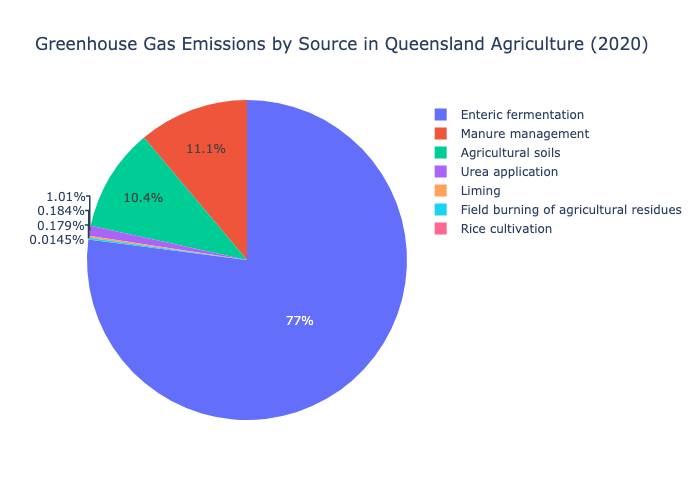

In [60]:
folder = "Data"
file_name = "plot3.png"
file_path = os.path.join(folder, file_name)

# Define the data
data = {
    'Source': ['Enteric fermentation', 'Manure management', 'Rice cultivation', 
               'Agricultural soils', 'Field burning of agricultural residues', 
               'Liming', 'Urea application'],
    'Emissions': [15909, 2300, 3, 2155, 37, 38, 209]  
}

# Create DataFrame
emissions_df = pd.DataFrame(data)

# Create a pie chart
fig = px.pie(emissions_df, values='Emissions', names='Source', 
             title='Greenhouse Gas Emissions by Source in Queensland Agriculture (2020)')

fig.write_image(file_path)
Image(file_path)

### Insight

> Indeed, the largest portion of greenhouse gas emissions in Queensland's agriculture, **at 77%, comes from enteric fermentation**. This is primarily due to methane emissions produced **from Queensland's large numbers of livestock, including beef, cattle and sheep.** Methane from enteric fermentation is a significant contributor to the agricultural sector's impact on climate change due to the digestive processes of ruminants. 
There is also another significant source of greenhouse gases associated with livestock farming - **manure management, which accounts for 11.1%.**


Interesting qoute about enteric fermentation from article [13.02.2024 - Australian red meat industry’s net zero target based on land-clearing data that is ‘not reliable’](https://www.theguardian.com/australia-news/2024/feb/13/australia-red-meat-industry-net-zero-target-land-clearing-data-not-reliable):

> And they said that since 2017 the red meat industry has spent more than $180m on research and development focused on reducing methane emissions from burping cattle, which accounts for almost 80% of the industry’s annual emissions. But these technologies are yet to prove commercially viable.
>
> “The net emissions reduction delivered by sequestration does not diminish from the continued investment in solutions and technology for the industry to reduce methane [produced by cattle],” a spokesperson said.


## Conclusion

The analysis of greenhouse gas emissions in Queensland's agriculture reveals a complex situation. 

As of 2020, there has been a modest reduction in emissions, achieving a 6.64% decrease from 2005 levels. This progress falls short of the goals, and the emission trends exhibit considerable volatility, making it challenging to predict future outcomes consistently. 

My predictive linear regression model forecasts that without significant additional measures, the reduction targets for 2030 and 2050 are unlikely to be met.

The news discusses doubts about the correctness of the data (regarding  land clearing), on which program goals are set and their achievement is assessed, and the program modelling itself. 

Additionally, the substantial impact of livestock, particularly through enteric fermentation which constitutes 77% of the sector's emissions, highlights the need for targeted measures in this area. 

Overall, the analysis results indicate that the topic is very complex and challenging, and it also concerns the community, requiring fundamental and meticulous approaches both to the data and to the modeling.